In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from matplotlib import pyplot as plt

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
M=100
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 100, 5,bias=True)
        self.pool=nn.MaxPool2d(14,stride=14)  
        self.fc2 = nn.Linear(2*2*100,10,bias=True)
        

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.fc2(x)
        
        return x

net = Net()
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
trainloss=[]
trainaccuracy=[]
testloss=[]
testaccuracy=[]

In [4]:
for epoch in range(30):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0


    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')   
    trainaccuracy.append(100 * correct // total)

    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    testaccuracy.append(100 * correct // total)

print('Finished Training')

[1,  2000] loss: 1.959
[1,  4000] loss: 1.671
[1,  6000] loss: 1.566
[1,  8000] loss: 1.478
[1, 10000] loss: 1.420
[1, 12000] loss: 1.382
Accuracy of the network on the 10000 test images: 50 %
Accuracy of the network on the 10000 test images: 50 %
[2,  2000] loss: 1.337
[2,  4000] loss: 1.311
[2,  6000] loss: 1.314
[2,  8000] loss: 1.292
[2, 10000] loss: 1.262
[2, 12000] loss: 1.266
Accuracy of the network on the 10000 test images: 57 %
Accuracy of the network on the 10000 test images: 56 %
[3,  2000] loss: 1.218
[3,  4000] loss: 1.221
[3,  6000] loss: 1.209
[3,  8000] loss: 1.217
[3, 10000] loss: 1.206
[3, 12000] loss: 1.203
Accuracy of the network on the 10000 test images: 59 %
Accuracy of the network on the 10000 test images: 57 %
[4,  2000] loss: 1.163
[4,  4000] loss: 1.155
[4,  6000] loss: 1.145
[4,  8000] loss: 1.194
[4, 10000] loss: 1.161
[4, 12000] loss: 1.147
Accuracy of the network on the 10000 test images: 62 %
Accuracy of the network on the 10000 test images: 60 %
[5,  200

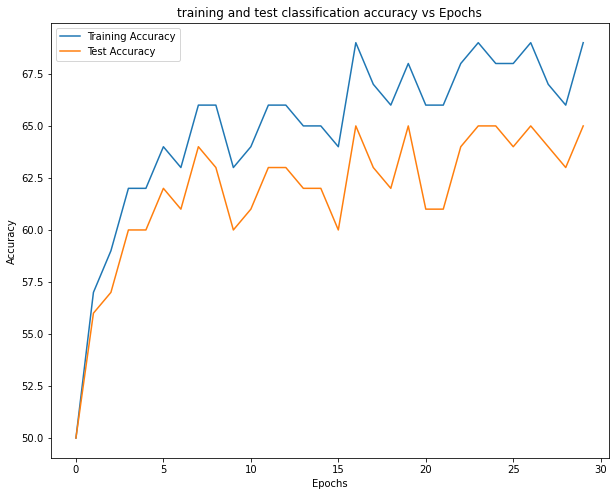

In [6]:
epoches=range(1,31)
fig=plt.figure(figsize=(10,8))
plt.plot(trainaccuracy,label='Training Accuracy')
plt.plot(testaccuracy,label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('training and test classification accuracy vs Epochs')
plt.legend()
plt.show()